In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('practice_data.xlsx')

In [3]:
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


In [4]:
df.dtypes

EmployeeID                        int64
gender                           object
department                       object
Days Present                      int64
Accuracy of Work                 object
Meeting Project Deadlines        object
Task Completion Rates             int64
Interpersonal Skills Rating       int64
Decision-Making Skills Rating     int64
Sales Revenue Generated           int64
churned                          object
dtype: object

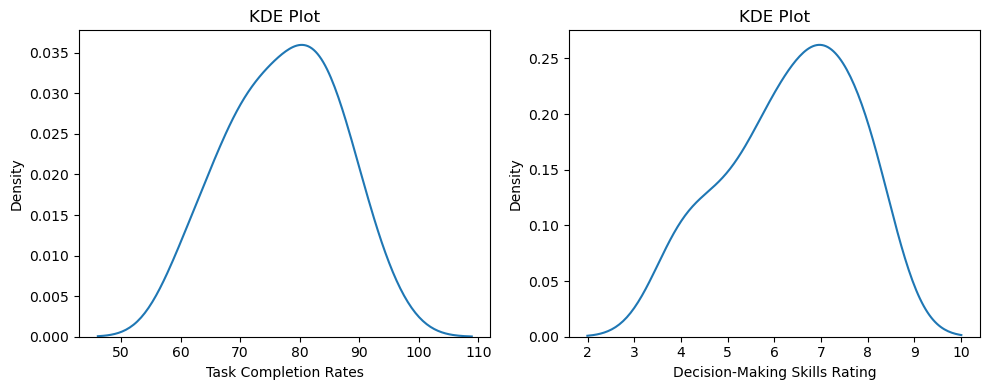

In [5]:
numeric_columns = ["Task Completion Rates","Decision-Making Skills Rating"]
fig, axes = plt.subplots(1,2, figsize=(10,4))
for index, column in enumerate(numeric_columns):
      sns.kdeplot(df[column], ax=axes[index])
      axes[index].set_title('KDE Plot')
plt.tight_layout()
plt.show()


In [6]:
# importing shapiro.
from scipy.stats import shapiro

In [7]:
numeric_columns = ['Interpersonal Skills Rating', 'Days Present','Task Completion Rates','Decision-Making Skills Rating']
shapiro_results = {}

for column in numeric_columns:
 stat, p_value = shapiro(df[column])
 shapiro_results[column] = round(p_value, 3)
     
 shapiro_results
print(shapiro_results)

{'Interpersonal Skills Rating': 0.015, 'Days Present': 0.044, 'Task Completion Rates': 0.321, 'Decision-Making Skills Rating': 0.004}


In [8]:
def sqrt_transformation(data, var):
    data[f'{var}_sqrt'] = np.sqrt(data[var])
    stat, p_value = shapiro(data[f'{var}_sqrt'])
    distribution = sns.kdeplot(data[f'{var}_sqrt'])
    print(distribution)
print('p_value: ',p_value)

p_value:  0.004243294820665754


In [9]:
column_name = df['Interpersonal Skills Rating']
def log_transformation(df, column_name):
 df[f'{column_name}_log'] = np.log(df[column_name])
 stat, p_value = shapiro(df[f'{column_name}_log'])
 distribution = sns.kdeplot(data[f'{column_name}_log'])
 print(distribution)
print('p-value: ', p_value)

p-value:  0.004243294820665754


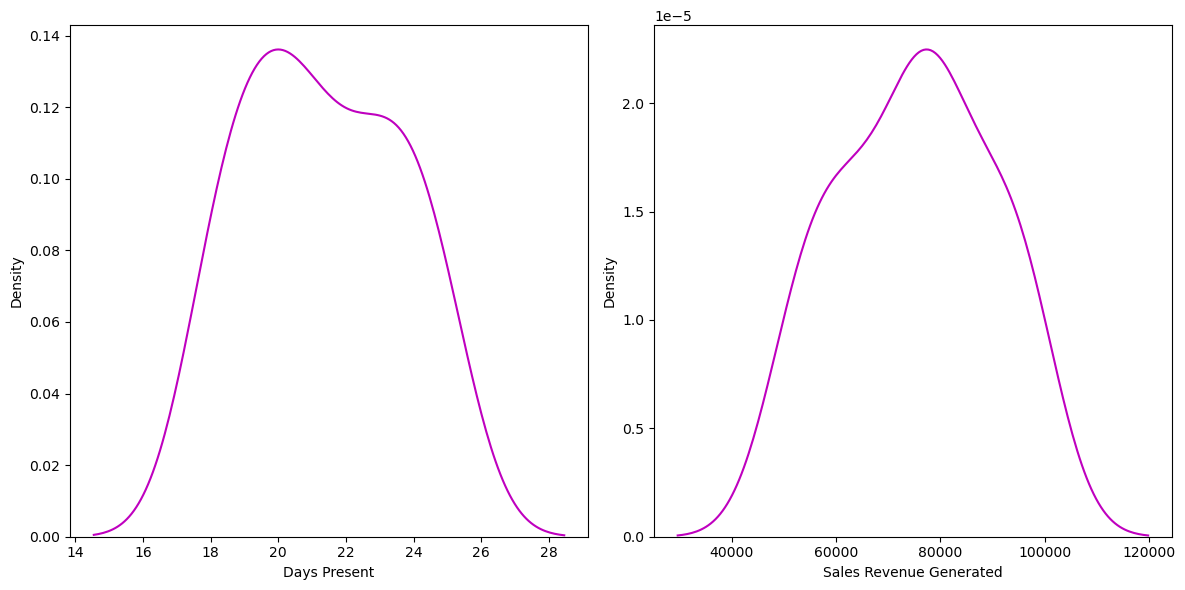

In [13]:
numeric_column = ['Days Present','Sales Revenue Generated']
plt.figure(figsize = (12,6))
plotnumber = 1
for col in numeric_column:
    if plotnumber <=4:
        ax = plt.subplot(1,2,plotnumber)
        sns.kdeplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [14]:
# Calculate min, max, and range
max_revenue = df['Sales Revenue Generated'].max()
min_revenue = df['Sales Revenue Generated'].min()
revenue_range = max_revenue - min_revenue

print(f"Max Revenue: ₹{max_revenue}")
print(f"Min Revenue: ₹{min_revenue}")
print(f"Revenue Range: ₹{revenue_range}")

Max Revenue: ₹97797
Min Revenue: ₹51638
Revenue Range: ₹46159


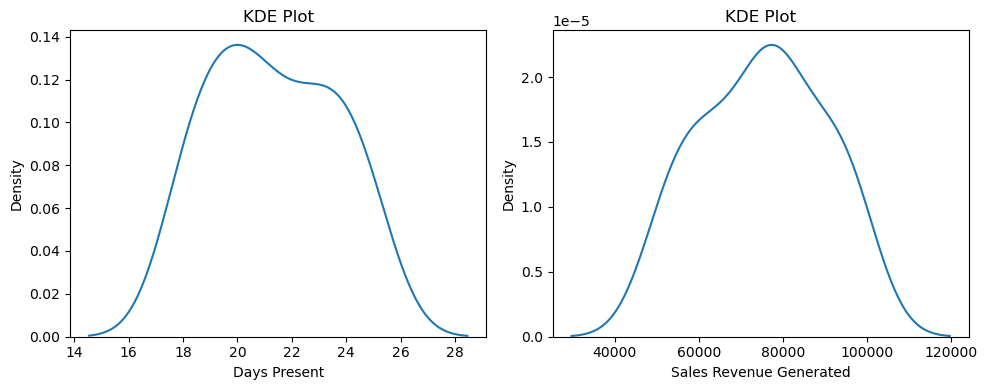

In [15]:
# 2nd way to find a "two kdeplots within one figure for Days Present and Sales Revenue Generated"?
 
numeric_columns = ["Days Present","Sales Revenue Generated"]
fig, axes = plt.subplots(1,2, figsize=(10,4))
for index, column in enumerate(numeric_columns):
      sns.kdeplot(df[column], ax=axes[index])
      axes[index].set_title('KDE Plot')
plt.tight_layout()
plt.show()